In [1]:
import numpy as np
import pandas as pd
import UncompressVid as uv
import vid_preproc as vp
import fft_utils as fu
import FFTSwayFreq as sf
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
VID_PATH = "../data/video/animations/sway_animation_1Hz_60s.mp4"

Y_MIN = 0
Y_MAX = 480
X_MIN = 0
X_MAX = 640

FREQ_LOW = 0.2 # Hz
FREQ_HIGH = 2  # Hz

NFREQ = 3

VERBOSE = True

In [3]:
vid_reader = uv.UncompressVid(VID_PATH)
fps = vid_reader.get_fps()
resolution = vid_reader.get_resolution()
vid = vid_reader.convert_to_arr(Y_MIN, Y_MAX, X_MIN, X_MAX)

Reading video into array
   Completed appending frame  500
   Completed appending frame  1000
   Completed appending frame  1500
   Completed appending frame  2000
   Completed appending frame  2500
   Completed appending frame  3000
Finished reading video


In [4]:
print(fps)
print(resolution)

50
[480, 640, 3]


In [5]:
vid = vp.isolate_rbg(vid, 2)
vid = vp.window_data(vid)

Windowing column0complete
Windowing column100complete
Windowing column200complete
Windowing column300complete
Windowing column400complete


In [6]:
maxf, f_ample, frequencies = fu.compute_frequency(vid, fps, FREQ_LOW, FREQ_HIGH, NFREQ)

In [7]:
masked_freq = fu.filter_by_amp(maxf, f_ample, 5000)

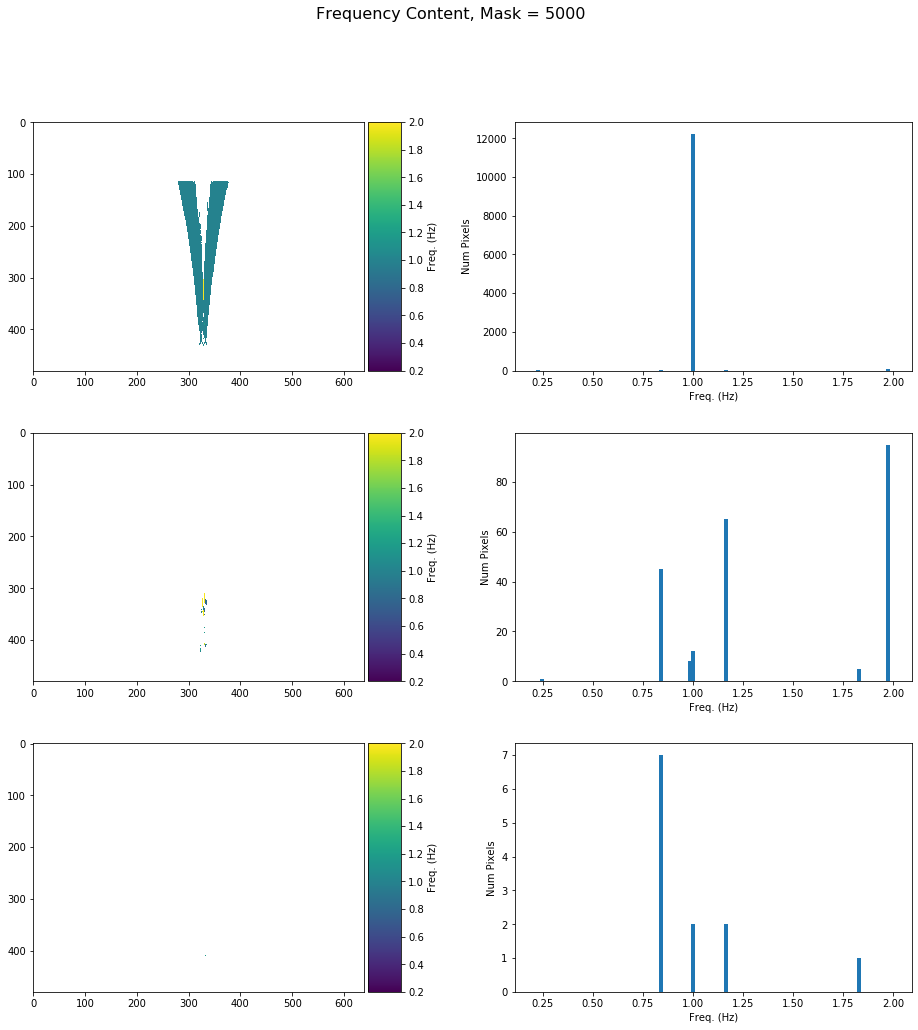

In [8]:
fu.plot_freq(masked_freq, maxf, NFREQ, FREQ_LOW, FREQ_HIGH, 'Mask = 5000')

No handles with labels found to put in legend.


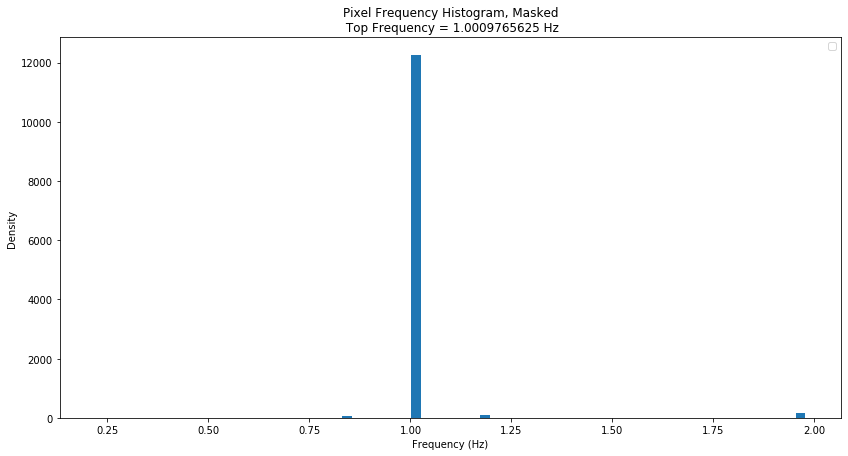

In [9]:
fu.plot_cumul_freq_hist(maxf, frequencies, 'Masked', masked_freq)